In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras import models, layers, utils, optimizers, callbacks
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [2]:
for dirname, _, filenames in os.walk('C:/Users/Pooja/OneDrive/Desktop/testset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
ndls_Temp_org_full=pd.read_csv("C:/Users/Pooja/OneDrive/Desktop/testset.csv")
ndls_Temp_org_full

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [5]:
print(ndls_Temp_org_full.dtypes)
print("================================================")
print(ndls_Temp_org_full.info())

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64

In [6]:
ndls_Temp_org_full.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [7]:
print("Before modification")
print(ndls_Temp_org_full.columns)
ndls_Temp_org_full.columns=ndls_Temp_org_full.columns.str.replace("_","")
ndls_Temp_org_full.columns=ndls_Temp_org_full.columns.str.replace(" ","")
ndls_Temp_org_full.columns
print("=================================")
print("After modification")
print(ndls_Temp_org_full.columns)

Before modification
Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')
After modification
Index(['datetimeutc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')


In [8]:
print(ndls_Temp_org_full["conds"].value_counts())
print("No of unique conditions:",len(ndls_Temp_org_full["conds"].unique()))

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

In [9]:
ndls_Temp_org_full["conds"]=ndls_Temp_org_full["conds"].replace(["Widespread Dust", "Blowing Sand", 
                                                           "Sandstorm", "Volcanic Ash" ,
                                                            "Light Sandstorm"], "Dust")
ndls_Temp_org_full["conds"]=ndls_Temp_org_full["conds"].replace(["Fog", "Shallow Fog", "Partial Fog",
                                                                "Light Fog", "Mist", "Heavy Fog", "Light Haze",
                                                                "Patches of Fog"], "Fog")
ndls_Temp_org_full["conds"]=ndls_Temp_org_full["conds"].replace(["Scattered Clouds", "Partly Cloudy", 
                                                                 "Mostly Cloudy" ,"Overcast",
                                                                 "Funnel Cloud"], "Cloudy")
ndls_Temp_org_full["conds"]=ndls_Temp_org_full["conds"].replace(["Light Rain", "Light Drizzle","Rain", "Drizzle", "Light Rain Showers"
                                                                 ,"Drizzle" ,"Rain Showers"], "Rain")
ndls_Temp_org_full["conds"]=ndls_Temp_org_full["conds"].replace(["Thunderstorms and Rain", "Light Thunderstorms and Rain",
                                                                 "Light Thunderstorm" ,"Heavy Thunderstorms and Rain",
                                            "Heavy Rain"], "Thunderstorm")
ndls_Temp_org_full["conds"]=ndls_Temp_org_full["conds"].replace(["Thunderstorms with Hail", "Squalls",
                                                                 "Light Hail Showers" ,"Light Freezing Rain",
                                                                "Heavy Thunderstorms with Hail", "Unknown"], "Others")

No of unique conditions for GROUPING: 10


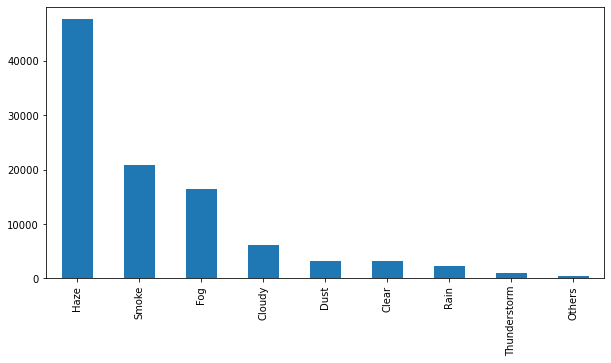

In [10]:
print("No of unique conditions for GROUPING:",len(ndls_Temp_org_full["conds"].unique()))
plt.figure(figsize=(10,5))
ndls_Temp_org_full["conds"].value_counts().plot(kind="bar")

In [11]:
le=LabelEncoder()
col="conds"
ndls_Temp_org_full[col] = ndls_Temp_org_full.apply(lambda x: le.fit_transform(ndls_Temp_org_full[col].astype(str)), axis=0, result_type='expand')

In [12]:
ndls_Temp_org_full["conds"]

0         7
1         7
2         7
3         7
4         7
         ..
100985    4
100986    4
100987    4
100988    4
100989    4
Name: conds, Length: 100990, dtype: int32

In [13]:
ndls_Temp_org_full["conds"].value_counts()

4    47602
7    20760
3    16416
1     6165
2     3246
0     3129
6     2229
8      968
5      403
9       72
Name: conds, dtype: int64

In [14]:
ndls_Temp_org_full=ndls_Temp_org_full.replace(0, np.nan)

In [15]:
print(ndls_Temp_org_full.isnull().sum())
print("TOTAL NAs:",ndls_Temp_org_full.isnull().sum().sum())

datetimeutc         0
conds            3129
dewptm            785
fog             93952
hail           100977
heatindexm      71835
hum               757
precipm        100990
pressurem         235
rain            98338
snow           100989
tempm             673
thunder        100038
tornado        100988
vism             4561
wdird           32246
wdire           14755
wgustm          99918
windchillm     100411
wspdm           31763
dtype: int64
TOTAL NAs: 1057340


In [16]:
halfrows=0.5*ndls_Temp_org_full.shape[0]
for i in ndls_Temp_org_full.columns:
    totalNA=ndls_Temp_org_full[i].isnull().sum()
    if(totalNA<halfrows):
        if(ndls_Temp_org_full[i].dtypes=="object"):
            tempmode=ndls_Temp_org_full[i].mode()[0]
            print(i," is categorical has",str(totalNA)," NA values replacing is mode: ",tempmode)
            ndls_Temp_org_full[i].fillna(tempmode, inplace=True)
        else:
            tempmedian=ndls_Temp_org_full[i].median()
            print(i," is continuous has",str(totalNA)," NA values replacing is median: ",tempmedian)
            ndls_Temp_org_full[i].fillna(tempmedian, inplace=True)
    else:
        print("Column to drop:", i, "Total NAs", totalNA)
        ndls_Temp_org_full.drop([i], axis=1, inplace=True)

datetimeutc  is categorical has 0  NA values replacing is mode:  19961101-11:00
conds  is continuous has 3129  NA values replacing is median:  4.0
dewptm  is continuous has 785  NA values replacing is median:  15.0
Column to drop: fog Total NAs 93952
Column to drop: hail Total NAs 100977
Column to drop: heatindexm Total NAs 71835
hum  is continuous has 757  NA values replacing is median:  59.0
Column to drop: precipm Total NAs 100990
pressurem  is continuous has 235  NA values replacing is median:  1008.0
Column to drop: rain Total NAs 98338
Column to drop: snow Total NAs 100989
tempm  is continuous has 673  NA values replacing is median:  27.0
Column to drop: thunder Total NAs 100038
Column to drop: tornado Total NAs 100988
vism  is continuous has 4561  NA values replacing is median:  2.0
wdird  is continuous has 32246  NA values replacing is median:  240.0
wdire  is categorical has 14755  NA values replacing is mode:  North
Column to drop: wgustm Total NAs 99918
Column to drop: windc

In [17]:
ndls_Temp_org_full

,datetimeutc,conds,dewptm,hum,pressurem,tempm,vism,wdird,wdire,wspdm
0,19961101-11:00,7.0,9.0,27.0,1010.0,30.0,5.0,280.0,West,7.4
1,19961101-12:00,7.0,10.0,32.0,-9999.0,28.0,2.0,240.0,North,9.3
2,19961101-13:00,7.0,11.0,44.0,-9999.0,24.0,2.0,240.0,North,9.3
3,19961101-14:00,7.0,10.0,41.0,1010.0,24.0,2.0,240.0,North,9.3
4,19961101-16:00,7.0,11.0,47.0,1011.0,23.0,1.2,240.0,North,9.3
...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,4.0,17.0,25.0,1005.0,34.0,4.0,320.0,NW,11.1
100986,20170424-09:00,4.0,14.0,16.0,1003.0,38.0,4.0,320.0,NW,22.2
100987,20170424-12:00,4.0,12.0,14.0,1002.0,36.0,4.0,270.0,West,18.5
100988,20170424-15:00,4.0,15.0,27.0,1004.0,32.0,2.0,320.0,NW,3.7


In [18]:
print(ndls_Temp_org_full["wdire"].value_counts())
print("No of unique conditions:",len(ndls_Temp_org_full["wdire"].unique()))

North       33789
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: wdire, dtype: int64
No of unique conditions: 17


In [19]:
ndls_Temp_org_full["wdire"]=ndls_Temp_org_full["wdire"].replace(["WNW", "WSW", "ESE", "ENE", "NNW", "SSE", "NNE" ,"SSW", "Variable"], 
                                                                ["West", "West", "East", "East", "North", "South", "North", "South", "North"])

In [20]:
ndls_Temp_org_full["wdire"].value_counts()

North    38242
West     24818
East     16290
NW        7117
South     5310
SE        3513
SW        3200
NE        2500
Name: wdire, dtype: int64

In [21]:
deg=45
ndls_Temp_org_full["wdire"]=ndls_Temp_org_full["wdire"].replace(["North","NE", "East","SE", "South","SW", "West", "NW"],
                                                                [0, deg, 2*deg, 3*deg, 4*deg, 5*deg, 6*deg, 7*deg])

In [22]:
ndls_Temp_org_full["wdire"].value_counts()

0      38242
270    24818
90     16290
315     7117
180     5310
135     3513
225     3200
45      2500
Name: wdire, dtype: int64

In [23]:
ndls_Temp_org_full

,datetimeutc,conds,dewptm,hum,pressurem,tempm,vism,wdird,wdire,wspdm
0,19961101-11:00,7.0,9.0,27.0,1010.0,30.0,5.0,280.0,270,7.4
1,19961101-12:00,7.0,10.0,32.0,-9999.0,28.0,2.0,240.0,0,9.3
2,19961101-13:00,7.0,11.0,44.0,-9999.0,24.0,2.0,240.0,0,9.3
3,19961101-14:00,7.0,10.0,41.0,1010.0,24.0,2.0,240.0,0,9.3
4,19961101-16:00,7.0,11.0,47.0,1011.0,23.0,1.2,240.0,0,9.3
...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,4.0,17.0,25.0,1005.0,34.0,4.0,320.0,315,11.1
100986,20170424-09:00,4.0,14.0,16.0,1003.0,38.0,4.0,320.0,315,22.2
100987,20170424-12:00,4.0,12.0,14.0,1002.0,36.0,4.0,270.0,270,18.5
100988,20170424-15:00,4.0,15.0,27.0,1004.0,32.0,2.0,320.0,315,3.7


In [24]:
#time Series Analysis
timeseries_fulldata=ndls_Temp_org_full.copy()

In [25]:
#Handling Date and time varibles
timeseries_fulldata["datetimeutc"].dtype

dtype('O')

In [26]:
timeseries_fulldata["datetimeutc"]=pd.to_datetime(timeseries_fulldata["datetimeutc"])
timeseries_fulldata.set_index("datetimeutc", inplace=True)
timeseries_fulldata

,conds,dewptm,hum,pressurem,tempm,vism,wdird,wdire,wspdm
datetimeutc,,,,,,,,,
1996-11-01 11:00:00,7.0,9.0,27.0,1010.0,30.0,5.0,280.0,270,7.4
1996-11-01 12:00:00,7.0,10.0,32.0,-9999.0,28.0,2.0,240.0,0,9.3
1996-11-01 13:00:00,7.0,11.0,44.0,-9999.0,24.0,2.0,240.0,0,9.3
1996-11-01 14:00:00,7.0,10.0,41.0,1010.0,24.0,2.0,240.0,0,9.3
1996-11-01 16:00:00,7.0,11.0,47.0,1011.0,23.0,1.2,240.0,0,9.3
...,...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,4.0,17.0,25.0,1005.0,34.0,4.0,320.0,315,11.1
2017-04-24 09:00:00,4.0,14.0,16.0,1003.0,38.0,4.0,320.0,315,22.2
2017-04-24 12:00:00,4.0,12.0,14.0,1002.0,36.0,4.0,270.0,270,18.5


In [27]:
ndls_daily=timeseries_fulldata.resample("D").mean()
ndls_daily

,conds,dewptm,hum,pressurem,tempm,vism,wdird,wdire,wspdm
datetimeutc,,,,,,,,,
1996-11-01,7.000,11.666667,52.916667,-2659.666667,22.333333,2.083333,243.333333,22.500000,9.141667
1996-11-02,6.375,10.458333,48.625000,1009.833333,22.916667,3.291667,236.666667,108.750000,12.062500
1996-11-03,7.000,12.041667,55.958333,1010.500000,21.791667,2.262500,246.666667,108.750000,9.829167
1996-11-04,6.500,10.222222,48.055556,1011.333333,22.722222,2.272222,242.222222,52.500000,9.088889
1996-11-05,7.000,8.200000,29.400000,1011.800000,27.800000,3.900000,208.000000,207.000000,10.020000
...,...,...,...,...,...,...,...,...,...
2017-04-20,4.000,16.750000,27.500000,998.625000,34.500000,2.500000,222.500000,157.500000,7.887500
2017-04-21,4.000,21.500000,39.375000,999.875000,34.250000,2.000000,92.500000,84.375000,6.962500
2017-04-22,4.300,20.400000,40.900000,1001.600000,32.900000,1.950000,163.000000,90.000000,10.750000


In [28]:
ndls_daily.isnull().sum() #nulls created due to rollup

conds        141
dewptm       141
hum          141
pressurem    141
tempm        141
vism         141
wdird        141
wdire        141
wspdm        141
dtype: int64

In [29]:
ndls_daily.fillna(ndls_daily.mean(), inplace=True)

In [30]:
ndls_daily.isnull().sum()

conds        0
dewptm       0
hum          0
pressurem    0
tempm        0
vism         0
wdird        0
wdire        0
wspdm        0
dtype: int64

In [31]:
ndls_daily_temp=pd.DataFrame(list(ndls_daily['tempm']), columns=['temp'])
ndls_daily_temp

,temp
0,22.333333
1,22.916667
2,21.791667
3,22.722222
4,27.800000
...,...
7475,34.500000
7476,34.250000
7477,32.900000
7478,32.875000


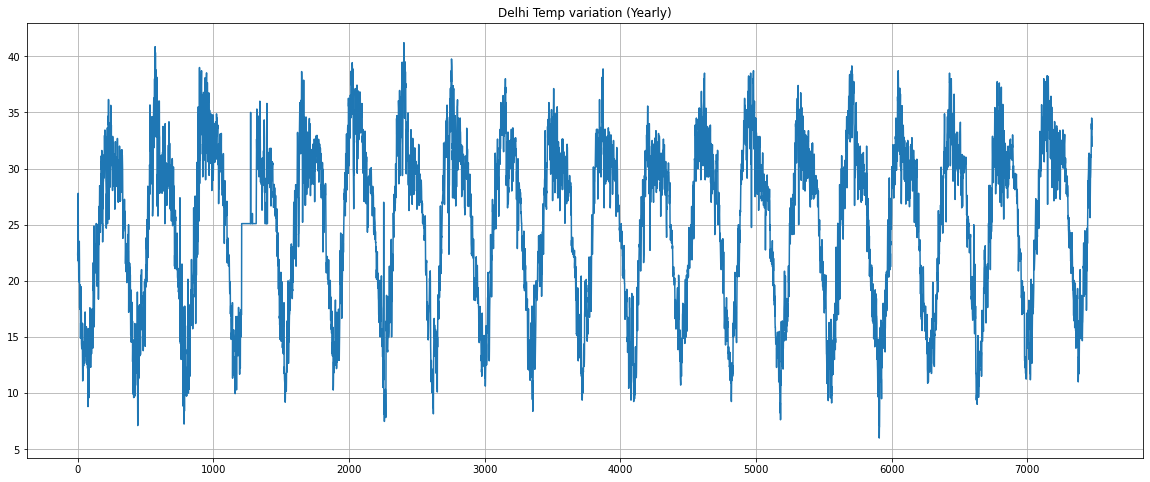

In [32]:
plt.figure(figsize=(20,8))
plt.plot(ndls_daily_temp)
plt.grid()
plt.title("Delhi Temp variation (Yearly)") 
plt.show()

In [33]:
#scaling of data
scaler=MinMaxScaler(feature_range=(-1,1))
ndls_daily_temp_scaled=scaler.fit_transform(ndls_daily_temp)
print(ndls_daily_temp_scaled)
print(ndls_daily_temp_scaled.shape)

[[-0.07224714]
 [-0.0391131 ]
 [-0.10301445]
 ...
 [ 0.52795217]
 [ 0.52653214]
 [ 0.47683109]]
(7480, 1)


In [34]:
#Creating the timeseries datatimeline
steps=30
X_part=[]
Y_part=[]
for i in range(len(ndls_daily_temp_scaled)-(steps)):
    X_part.append(ndls_daily_temp_scaled[i:i+steps])
    Y_part.append(ndls_daily_temp_scaled[i+steps])
    
X_part=np.array(X_part)
Y_part=np.array(Y_part)

print(X_part.shape)
print(Y_part.shape)

(7450, 30, 1)
(7450, 1)


In [35]:
#Train Test Split
train_X=X_part[:7300,::]
test_X=X_part[7300:,::]
print("train_X Shape:",train_X.shape, ",test_X Shape:", test_X.shape)

train_Y=Y_part[:7300]
test_Y=Y_part[7300:]
print("test_Y Shape:",train_Y.shape, ",test_Y Shape:", test_Y.shape)

train_X Shape: (7300, 30, 1) ,test_X Shape: (150, 30, 1)
test_Y Shape: (7300, 1) ,test_Y Shape: (150, 1)


In [37]:
history=model1.fit(train_X, train_Y, epochs=200, verbose=0, callbacks=[Earlystp, Savemod])

NameError: name 'model1' is not defined


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=7dc3d5cff3a2806e25eb52b512f99d315b93964fa0e48be59226d5e6c3928a4b
  Stored in directory: c:\users\pooja\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
